In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('Alcohol_Sales.csv')


In [25]:
df.head(5)


,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [28]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [29]:
df = df.sort_values('DATE')

# Summary

 Qual é o período temporal coberto pelo dataset de vendas de álcool?

In [30]:
df['DATE'].agg(['min', 'max'])


min   1992-01-01
max   2019-01-01
Name: DATE, dtype: datetime64[ns]

Quantos registros (meses) existem na série temporal?

In [8]:
df['DATE'].shape[0]

325

Qual é a frequência dos dados (mensal, anual, diária)?

In [9]:
df = df.set_index('DATE')
pd.infer_freq(df.index)


'MS'

Qual é o valor médio das vendas ao longo de todo o período analisado?

In [10]:
round(df['S4248SM144NCEN'].mean())

7886

Quais são os valores mínimo e máximo das vendas registadas?

In [11]:
print(f"Maior valor de venda registrado: {df['S4248SM144NCEN'].max()}")
print(f"Menor valor de venda registrado: {df['S4248SM144NCEN'].min()}")

Maior valor de venda registrado: 15504
Menor valor de venda registrado: 3031


Como as vendas se distribuem ao longo do tempo (níveis baixos, médios e altos)?

In [12]:
bins = [df['S4248SM144NCEN'].min(), df['S4248SM144NCEN'].quantile(0.33), 
        df['S4248SM144NCEN'].quantile(0.66), df['S4248SM144NCEN'].max()]

labels = ['Baixa', 'Média', 'Alta']

df['Categoria'] = pd.cut(df['S4248SM144NCEN'], bins=bins, labels=labels)
df['Categoria']

DATE
1992-01-01    Baixa
1992-02-01    Baixa
1992-03-01    Baixa
1992-04-01    Baixa
1992-05-01    Baixa
              ...  
2018-09-01     Alta
2018-10-01     Alta
2018-11-01     Alta
2018-12-01     Alta
2019-01-01     Alta
Name: Categoria, Length: 325, dtype: category
Categories (3, object): ['Baixa' < 'Média' < 'Alta']

In [13]:
df['Categoria'].value_counts()


Categoria
Alta     111
Média    107
Baixa    106
Name: count, dtype: int64

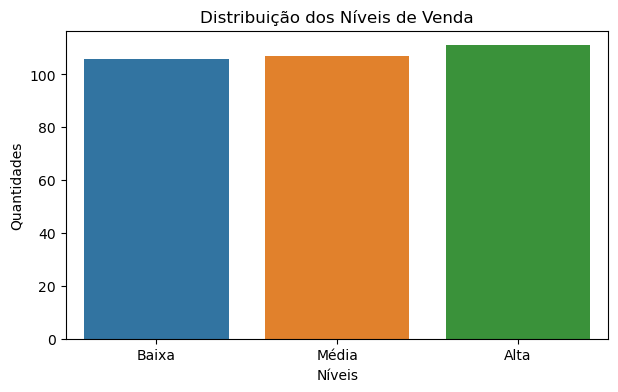

In [20]:
plt.figure(figsize=(7,4))
sns.countplot(x='Categoria', data=df)
plt.title('Distribuição dos Níveis de Venda')
plt.xlabel('Níveis')
plt.ylabel('Quantidades')
plt.show()


# Insights

Existe uma tendência de crescimento ou queda nas vendas de álcool ao longo dos anos?

In [44]:
df['Ano'] = df['DATE'].dt.year
media_anual = df.groupby('Ano')['S4248SM144NCEN'].mean()
round(media_anual)

Ano
1992     4200.0
1993     4235.0
1994     4335.0
1995     4375.0
1996     4662.0
1997     4859.0
1998     5147.0
1999     5611.0
2000     5945.0
2001     6238.0
2002     6599.0
2003     6904.0
2004     7243.0
2005     7685.0
2006     8198.0
2007     8652.0
2008     9109.0
2009     9067.0
2010     9279.0
2011     9702.0
2012    10170.0
2013    10835.0
2014    10893.0
2015    11374.0
2016    11973.0
2017    12392.0
2018    13016.0
2019    10718.0
Name: S4248SM144NCEN, dtype: float64

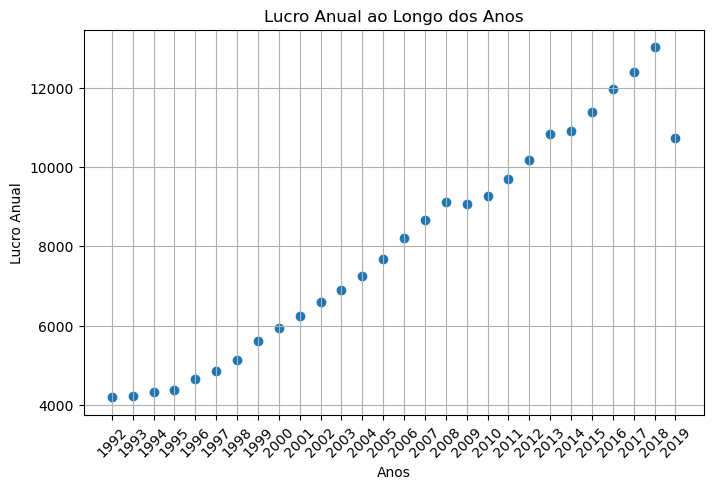

In [71]:
plt.figure(figsize=(8,5))

plt.scatter(df_anual.index, df_anual.values)
plt.grid(True)

plt.xticks(df_anual.index, rotation=45)  # força mostrar todos os anos
plt.xlabel('Anos')
plt.ylabel('Lucro Anual')
plt.title('Lucro Anual ao Longo dos Anos')
plt.show()


É possível identificar padrões sazonais nas vendas (ex.: meses com vendas consistentemente mais altas)?






In [32]:
df['Mes'] = df['DATE'].dt.month
round(df.groupby('Mes')['S4248SM144NCEN'].mean())

Mes
1     6089.0
2     6442.0
3     7620.0
4     7580.0
5     8363.0
6     8738.0
7     7866.0
8     8334.0
9     7801.0
10    8238.0
11    8273.0
12    9359.0
Name: S4248SM144NCEN, dtype: float64

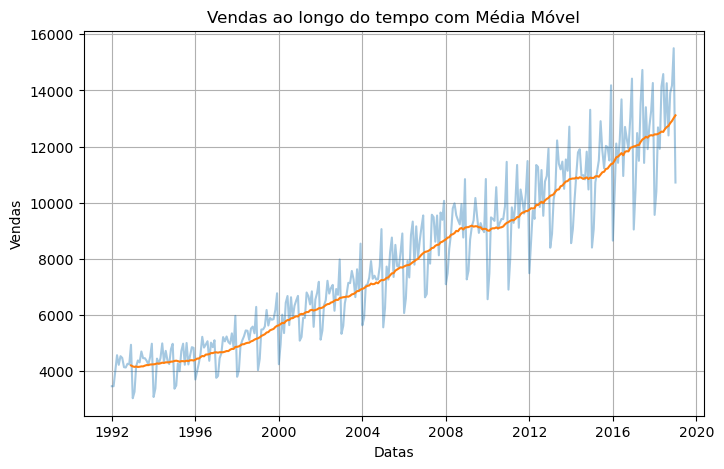

In [50]:
df['media_movel'] = df['S4248SM144NCEN'].rolling(window=12).mean()
plt.figure(figsize=(8,5))

plt.plot(df['DATE'], df['S4248SM144NCEN'], alpha=0.4)
plt.plot(df['DATE'], df['media_movel'])

plt.xlabel('Datas')
plt.ylabel('Vendas')
plt.title('Vendas ao longo do tempo com Média Móvel')
plt.grid(True)


plt.show()


Quais meses apresentam picos recorrentes de vendas ao longo dos anos?

In [47]:
df['Mes'] = df['DATE'].dt.month
round(df.groupby('Mes')['S4248SM144NCEN'].mean().sort_values(ascending=False))

Mes
12    9359.0
6     8738.0
5     8363.0
8     8334.0
11    8273.0
10    8238.0
7     7866.0
9     7801.0
3     7620.0
4     7580.0
2     6442.0
1     6089.0
Name: S4248SM144NCEN, dtype: float64

Existem períodos com quedas abruptas ou valores atípicos nas vendas?

In [72]:
media = df['S4248SM144NCEN'].mean()
desvio = df['S4248SM144NCEN'].std()

# Valores considerados “fora do normal”
outliers = df[(df['S4248SM144NCEN'] > media + 2*desvio) | (df['S4248SM144NCEN'] < media - 2*desvio)]
outliers


,DATE,S4248SM144NCEN,Ano,Mes,media_movel,diff
287,2015-12-01,14183,2015,12,11374.166667,2677.0
299,2016-12-01,14421,2016,12,11973.250000,1405.0
305,2017-06-01,14730,2017,6,12250.500000,1185.0
311,2017-12-01,14265,2017,12,12392.000000,1004.0
316,2018-05-01,14138,2018,5,12534.250000,2219.0
317,2018-06-01,14583,2018,6,12522.000000,445.0
319,2018-08-01,14257,2018,8,12695.250000,1617.0
321,2018-10-01,13914,2018,10,12836.250000,1518.0
322,2018-11-01,14174,2018,11,12912.333333,260.0
323,2018-12-01,15504,2018,12,13015.583333,1330.0


Como as vendas dos últimos anos se comparam com os primeiros anos da série?


In [73]:
data_media = df['DATE'].mean()

primeiros_anos = df[df['DATE'] <= data_media]
ultimos_anos = df[df['DATE'] > data_media]

media_primeiros_anos = primeiros_anos['S4248SM144NCEN'].mean()
media_ultimos_anos = ultimos_anos['S4248SM144NCEN'].mean

print(f"Média primeiros anos: {round(media_primeiros_anos)}\nMédia últimos anos: {media_primeiros_anos}")


Média primeiros anos: 5493
Média últimos anos: 5492.950920245399


Há indícios de que eventos sazonais (fim de ano, feriados) influenciam o volume de vendas?


In [74]:
df['Mes'] = df['DATE'].dt.month
media_por_mes = df.groupby('Mes')['S4248SM144NCEN'].mean()
round(media_por_mes)


Mes
1     6089.0
2     6442.0
3     7620.0
4     7580.0
5     8363.0
6     8738.0
7     7866.0
8     8334.0
9     7801.0
10    8238.0
11    8273.0
12    9359.0
Name: S4248SM144NCEN, dtype: float64

Text(0.5, 1.0, 'Vendas consoate os Meses do Ano')

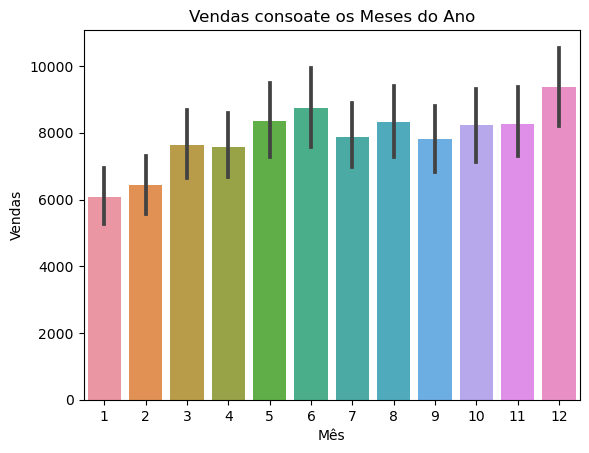

In [83]:
sns.barplot(x='Mes', y='S4248SM144NCEN',data=df)
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Vendas consoate os Meses do Ano')


A variabilidade das vendas aumenta ou diminui ao longo do tempo?

In [85]:
df['Ano'] = df['DATE'].dt.year
desvio_anual = df.groupby('Ano')['S4248SM144NCEN'].std()
round(desvio_anual)


Ano
1992     427.0
1993     554.0
1994     582.0
1995     550.0
1996     483.0
1997     625.0
1998     675.0
1999     743.0
2000     774.0
2001     689.0
2002     774.0
2003     873.0
2004     879.0
2005     992.0
2006    1113.0
2007    1159.0
2008    1072.0
2009     969.0
2010    1261.0
2011    1290.0
2012    1294.0
2013    1255.0
2014    1288.0
2015    1538.0
2016    1533.0
2017    1628.0
2018    1761.0
2019       NaN
Name: S4248SM144NCEN, dtype: float64